# Spherical Lens

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Library

In [2]:
# --- Ray class ---
from matplotlib.pylab import normal


class Ray:
    def __init__(self, x0=0, y0=0, x1=1, y1=1, n=1.0):
        self.x0 = x0
        self.y0 = y0
        self.x1 = x1
        self.y1 = y1
        self.n = n
        self.length = np.sqrt((x1 - x0)**2 + (y1 - y0)**2)
        self.opl = self.length * n
        self.direction = np.array([x1 - x0, y1 - y0]) / self.length

class Surface:
    def __init__(self, x, y, normal_x, normal_y):
        self.x = x
        self.y = y
        self.normal_x = normal_x
        self.normal_y = normal_y

def rotate_coordinates(x, y, angle):
    rotated_x = x * np.cos(angle) - y * np.sin(angle)
    rotated_y = x * np.sin(angle) + y * np.cos(angle)
    return rotated_x, rotated_y

# Define the parametric equations of the semi-circle
def semi_circle(t, radius):
    x = radius * np.cos(t)
    y = radius * np.sin(t)
    return x, y

# Define the derivatives
def semi_circle_derivatives(t, radius):
    dx_dt = -radius * np.sin(t)
    dy_dt = radius * np.cos(t)
    return dx_dt, dy_dt

# Define the parametric equations of the semi-circle normals
def semi_circle_normals(t):
    dx_dt = np.cos(t)
    dy_dt = np.sin(t)
    return dx_dt, dy_dt

## Surface class

In [3]:
# Generate t values
t_array = np.linspace(-np.pi/2, np.pi/2, 1000)

# Generate x and y values for the semi-circle surface
x_array, y_array = semi_circle(t_array, radius=5)

# Calculate derivatives
dx_dt_array, dy_dt_array = semi_circle_derivatives(t_array, radius=5)

# Calculate derivatives
normal_x, normal_y = semi_circle_normals(t_array)

# Rotate coordinates
x_array, y_array = rotate_coordinates(x_array, y_array, np.pi)
dx_dt_array, dy_dt_array = rotate_coordinates(dx_dt_array, dy_dt_array, np.pi)
normal_x, normal_y = rotate_coordinates(normal_x, normal_y, np.pi)


surface1 = Surface(x_array, y_array, normal_x, normal_y)

## Plot normals

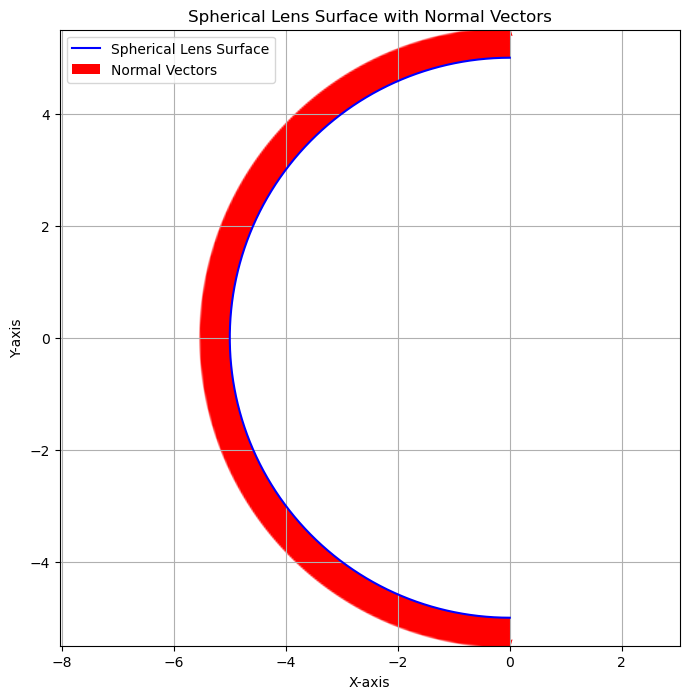

In [4]:
plt.figure(figsize=(8, 8))
plt.plot(x_array, y_array, label='Spherical Lens Surface', color='blue')
plt.quiver(surface1.x, surface1.y, surface1.normal_x, surface1.normal_y, color='red', scale=20, width=0.003, label='Normal Vectors')
plt.axis('equal')
plt.title('Spherical Lens Surface with Normal Vectors')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.grid()
plt.show()

## Find the angle between the incoming ray and the normal

NameError: name 'plot_normal_line' is not defined

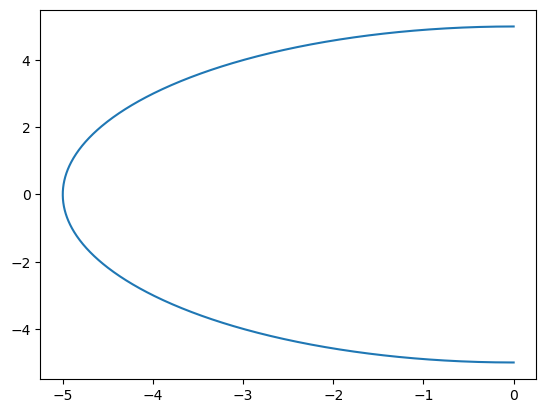

In [5]:
# Plot the surface
plt.plot(x_array, y_array, label='Semi-Circle Surface')

# Plot the normal lines
for i in range(0, len(x_array), 100):
    x_normal, y_normal = plot_normal_line(x_array[i], y_array[i], dx_dt_array[i], dy_dt_array[i])
    plt.plot(x_normal, y_normal, linestyle='--', alpha=0.5)

# Define the starting point of the ray
start_x = -10
start_y = 0

# Plot the rays
for i in range(len(x_array)):
    ray = Ray(x0=start_x, y0=start_y, x1=x_array[i], y1=y_array[i], n=1.5)
    
    # Calculate the distance from the starting point to the intersection with the circle
    A = ray.direction[0]**2 + ray.direction[1]**2
    B = 2 * (ray.x0 * ray.direction[0] + ray.y0 * ray.direction[1])
    C = ray.x0**2 + ray.y0**2 - 5**2
    
    discriminant = B**2 - 4 * A * C
    
    if discriminant >= 0:
        t = (-B - np.sqrt(discriminant)) / (2 * A)
        if t >= 0:
            intersection_x = ray.x0 + t * ray.direction[0]
            intersection_y = ray.y0 + t * ray.direction[1]
            normal_vector = np.array([-dy_dt_array[i], dx_dt_array[i]]) / np.sqrt(dx_dt_array[i]**2 + dy_dt_array[i]**2)
            incident_vector = ray.direction
            angle = np.arccos(np.dot(normal_vector, incident_vector))
            plt.plot([ray.x0, intersection_x], [ray.y0, intersection_y], color='gray', alpha=0.5)
            print(f'Angle: {np.degrees(angle)} degrees')

plt.xlabel('x')
plt.ylabel('y')
plt.xlim(-6, 6)
plt.ylim(-6, 6)
plt.title('Semi-Circle Surface Evaluation')
plt.grid()
plt.legend()
plt.gca().set_aspect('equal')
plt.show()

## Compute the outgoing rays

## Find where rays hit a plane downstream
- Use theta to find the y value for some x distance

## Find out what kind of terms are used to define the surface of a refractive lens